## Tarea 2: Felipe Conejeros y Mabel González

## Librerías a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
import linearmodels.panel as lmp
import seaborn as sns

%matplotlib inline

## Pregunta 1: Limpieza y análisis descriptivo de los datos

### Limpieza de datos

In [2]:
charls = pd.read_csv('../data/charls.csv')
charls.head()

,cesd,child,drinkly,female,hrsusu,hsize,inid,intmonth,married,retired,schadj,urban,wave,wealth,age
0,6,2,0.None,1,0.0,4,1.010410e+10,7,1,0,0,0,1,-5800.0,46
1,7,2,0.None,1,49.0,4,1.010410e+10,7,1,0,0,0,2,100.0,46
2,5,2,0.None,1,56.0,7,1.010410e+10,8,1,0,0,0,3,-59970.0,46
3,0,2,1.Yes,0,63.0,4,1.010410e+10,7,1,0,4,0,1,-5800.0,48
4,5,2,1.Yes,0,49.0,4,1.010410e+10,7,1,0,4,0,2,100.0,48


Dado que los valores de la variable inid mantienen un error de la base de datos fuente, se procederá a eliminar las observaciones desde la fila 10.057.

In [3]:
charls = charls.drop(range(10057,34371),axis=0)
charls.head(-1)

,cesd,child,drinkly,female,hrsusu,hsize,inid,intmonth,married,retired,schadj,urban,wave,wealth,age
0,6,2,0.None,1,0.0,4,1.010410e+10,7,1,0,0,0,1,-5800.0,46
1,7,2,0.None,1,49.0,4,1.010410e+10,7,1,0,0,0,2,100.0,46
2,5,2,0.None,1,56.0,7,1.010410e+10,8,1,0,0,0,3,-59970.0,46
3,0,2,1.Yes,0,63.0,4,1.010410e+10,7,1,0,4,0,1,-5800.0,48
4,5,2,1.Yes,0,49.0,4,1.010410e+10,7,1,0,4,0,2,100.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10051,5,1,0.None,1,0.0,5,9.400430e+10,7,1,1,8,1,2,505000.0,69
10052,3,1,1.Yes,1,0.0,4,9.400430e+10,8,1,1,8,1,3,1479000.0,69
10053,4,2,0.None,1,0.0,2,9.400431e+10,8,0,1,8,1,1,3000.0,61
10054,5,2,0.None,1,0.0,2,9.400431e+10,7,0,1,8,1,2,32500.0,61


De la columna "drinkly", se tienen valores tipo string, por lo que reemplazará de la siguiente forma:
* 0.None: 0
* 1.Yes: 1

In [4]:
for i in range(len(charls)):
    if charls["drinkly"][i] == "0.None":
        charls["drinkly"][i] = 0
        
for i in range(len(charls)):
    if charls["drinkly"][i] == "1.Yes":
        charls["drinkly"][i] = 1   

<ipython-input-4-cfdd89e65fa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charls["drinkly"][i] = 0
<ipython-input-4-cfdd89e65fa3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charls["drinkly"][i] = 1


Por otro lado, se encontraron valores ".m:missing" en la misma columna, por lo que las filas que lo contengan serán eliminadas.

In [5]:
k = 0

id_missing = []
wave_missing = []

for i in range(len(charls)):
    if charls["drinkly"][i] == '.m:missing':
        id_missing.append(i)
        wave_missing.append(charls["wave"][i])
        k += 1
        
print("Se encontraron", k, "filas con string '.m:missing' de la columna 'drinkly', las cuales serán eliminadas")
print("Se eliminará el inid completo, considerando sus distintos 'wave'")

for i in id_missing:
    if charls["wave"][i] == 2:
        print("Se elimina la fila", i, "con 'inid'", charls["inid"][i], "y 'wave'", charls["wave"][i])
        print("Se elimina la fila", i - 1, "con 'inid'", charls["inid"][i - 1], "y 'wave'",charls["wave"][i - 1])
        print("Se elimina la fila", i + 1, "con 'inid'", charls["inid"][i + 1], "y 'wave'",charls["wave"][i + 1])
        print("-----------------------------------------------------------")
        
    if charls["wave"][i] == 3:
        print("Se elimina la fila", i, "con 'inid'", charls["inid"][i], "y 'wave'", charls["wave"][i])
        print("Se elimina la fila", i - 1, "con 'inid'", charls["inid"][i - 1], "y 'wave'",charls["wave"][i - 1])
        print("Se elimina la fila", i - 2, "con 'inid'", charls["inid"][i - 2], "y 'wave'",charls["wave"][i - 2])
        print("-----------------------------------------------------------")
        
for i in id_missing:
    if charls["wave"][i] == 2:
        charls = charls.drop([i])
        charls = charls.drop([i - 1])
        charls = charls.drop([i + 1])
    elif charls["wave"][i] == 3:
        charls = charls.drop([i])
        charls = charls.drop([i - 1])
        charls = charls.drop([i - 2])

Se encontraron 7 filas con string '.m:missing' de la columna 'drinkly', las cuales serán eliminadas
Se eliminará el inid completo, considerando sus distintos 'wave'
Se elimina la fila 4712 con 'inid' 56059207001.0 y 'wave' 3
Se elimina la fila 4711 con 'inid' 56059207001.0 y 'wave' 2
Se elimina la fila 4710 con 'inid' 56059207001.0 y 'wave' 1
-----------------------------------------------------------
Se elimina la fila 4813 con 'inid' 56059314002.0 y 'wave' 2
Se elimina la fila 4812 con 'inid' 56059314002.0 y 'wave' 1
Se elimina la fila 4814 con 'inid' 56059314002.0 y 'wave' 3
-----------------------------------------------------------
Se elimina la fila 5878 con 'inid' 57457309001.0 y 'wave' 2
Se elimina la fila 5877 con 'inid' 57457309001.0 y 'wave' 1
Se elimina la fila 5879 con 'inid' 57457309001.0 y 'wave' 3
-----------------------------------------------------------
Se elimina la fila 6326 con 'inid' 58202302001.0 y 'wave' 3
Se elimina la fila 6325 con 'inid' 58202302001.0 y 'wav

In [6]:
charls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10036 entries, 0 to 10056
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cesd      10036 non-null  int64  
 1   child     10036 non-null  int64  
 2   drinkly   10036 non-null  object 
 3   female    10036 non-null  int64  
 4   hrsusu    10036 non-null  float64
 5   hsize     10036 non-null  int64  
 6   inid      10036 non-null  float64
 7   intmonth  10036 non-null  int64  
 8   married   10036 non-null  int64  
 9   retired   10036 non-null  int64  
 10  schadj    10036 non-null  int64  
 11  urban     10036 non-null  int64  
 12  wave      10036 non-null  int64  
 13  wealth    10036 non-null  float64
 14  age       10036 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 1.2+ MB


De la salida anterior, se observa que "drinkly" es una variable de tipo objeto, por lo que se cambiará a float con el fin de usar los modelos.

In [7]:
charls = charls.astype({"drinkly":"float"})

age
56    483
57    477
48    465
59    447
58    417
     ... 
31      3
29      3
27      3
26      3
89      3
Length: 61, dtype: int64

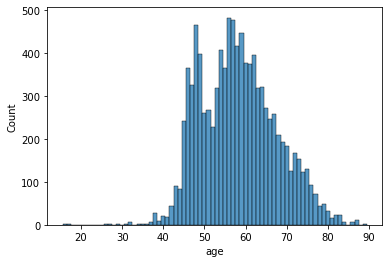

In [8]:
sns.histplot(charls, x = "age", discrete = True)
charls.value_counts("age")

Del gráfico anterior, correspondiente a la distribución de "age", no se observan outliers.

hrsusu
0.0     3441
56.0     901
70.0     650
42.0     457
35.0     405
        ... 
32.5       1
66.5       1
38.5       1
62.5       1
90.0       1
Length: 79, dtype: int64

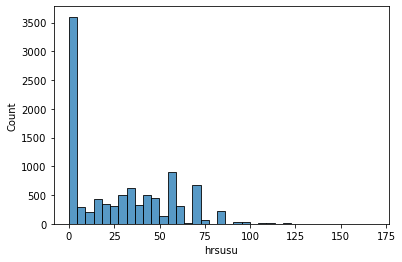

In [9]:
sns.histplot(charls, x = "hrsusu")
charls.value_counts("hrsusu")

De la figura anterior, se identifican posibles outliers para la variable "hrsusu".

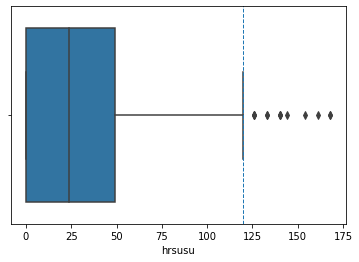

In [10]:
sns.boxplot(x = charls["hrsusu"])
plt.axvline(120, 0,20, ls='--', lw=1)

Del boxplot, se verifica la existencia de outliers, que corresponden a un "hrsusu" mayor que 120. Estas observaciones serán eliminadas.

In [11]:
borrar = charls[charls["hrsusu"] > 120].index
charls = charls.drop(borrar)

In [12]:
# charls data
charls.dropna(inplace=True)
charls.reset_index(drop=True, inplace=True)


#variable construction
X=charls[['cesd','child','drinkly','female','hrsusu','hsize','intmonth','married','retired','schadj','urban','wealth','age']]
Xm=(X.groupby(charls['inid']).transform('mean'))

Xid=charls[['inid','wave','cesd','child','drinkly','female','hrsusu','hsize','intmonth','married','retired','schadj','urban','wealth','age']]
Xc=pd.DataFrame(np.c_[Xid, Xm], columns=['inid','wave','cesd','child','drinkly','female','hrsusu','hsize','intmonth','married','retired','schadj','urban','wealth','age','mcesd','mchild','mdrinkly','mfemale','mhrsusu','mhsize','mintmonth','mmarried','mretired','mschadj','murban','mwealth','mage'])
Xc = Xc.set_index(['inid','wave'])

### Análisis descriptivo

In [13]:
charls.describe()

,cesd,child,drinkly,female,hrsusu,hsize,inid,intmonth,married,retired,schadj,urban,wave,wealth,age
count,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,1.002300e+04,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,1.002300e+04,10023.000000
mean,8.867106,2.768433,0.323855,0.542851,27.809189,3.654195,4.886154e+10,7.593236,0.857927,0.269081,4.092787,0.315574,1.999401,1.019523e+04,58.229372
std,6.291789,1.435903,0.467969,0.498185,26.942820,1.785813,2.297920e+10,1.101360,0.349143,0.443504,3.604440,0.464767,0.816415,9.958253e+04,9.233720
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.010410e+10,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.750000e+05,16.000000
25%,4.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.110611e+10,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,51.000000
50%,8.000000,2.000000,0.000000,1.000000,24.000000,3.000000,5.630230e+10,7.000000,1.000000,0.000000,4.000000,0.000000,2.000000,3.000000e+02,58.000000
75%,13.000000,3.000000,1.000000,1.000000,49.000000,5.000000,6.403312e+10,8.000000,1.000000,1.000000,4.000000,1.000000,3.000000,4.075000e+03,64.000000
max,30.000000,10.000000,1.000000,1.000000,120.000000,13.000000,1.017910e+11,12.000000,1.000000,1.000000,16.000000,1.000000,3.000000,8.001500e+06,89.000000


La tabla anterior corresponde a la base de datos final que se analizará, la cual cuenta con un total de 10.023 observaciones. 
* Para la variable "cesd", correspondiente al puntaje en la escala de la salud mental, se observa un promedio de 8,86, con un mínimo de 0 y un máximo de 30.
* "child", perteneciente al número de hijos, tiene una media de 2,76, con un valor mínimo de 0 y máximo de 10.
* La variables binarias "drinkly" y "female" mantienen un promedio de 0,32 y 0,54, respectivamente.
* "hrsusu" corresponde a las horas promedio de trabajo semanal, la cual mantiene un promedio de 27,8, un máximo de 120 (aproximadamente 17 horas por día) y un mínimo de 0.
* "hsize" pertenece al tamaño del hogar, con un promedio de 3,65, un máximo de 13 y un mínimo de 1.
* La variable "intmonth" corresponde al mes en que el individuo fue encuestado.
* "married" y "retired" son variables binarias correspondientes a que si la persona está o no casada y pensionada, la cual mantiene una media de 0,85 y de 0,26, respectivamente.
* La variable "schadj" corresponde a los años de escolaridad, con un promedio de 4,1, un máximo de 16 y un mínimo de 0.
* "urban" es una variable binaria para describir si la persona vive en la zona urbana o no, con un promedio de 0,31.
* "wealth" corresponde a la riqueza neta, con un promedio de 1.0e+04, un máximo de 8.0e+06	y un mínimo de -9.7e+05.
* Finalmente, la variable "age" corresponde a la edad al entrar a la encuesta.

## Pregunta 2: Modelo Pooled OLS

In [14]:
y=Xc['cesd']
X=Xc[['child','drinkly','female','hrsusu','hsize','married','retired','schadj','urban','wealth','age']]
X=sm.add_constant(X)

model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cesd   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     70.79
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          9.09e-154
Time:                        20:14:17   Log-Likelihood:                -32281.
No. Observations:               10023   AIC:                         6.459e+04
Df Residuals:                   10011   BIC:                         6.467e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1256      0.600     18.544      0.0

C:\Users\felip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Interpretación:

El modelo Pooled OLS equivale a estimar el efecto promedio, asumiendo que el tiempo afecta a todas las unidades de la misma forma. 
El método asume que todas la personas encuestadas son idénticas, lo que puede ocasionar que se sobredimensione la verdadera relación entre las variables.

* El valor de 0,072 del R-cuadrado indica que sólo un 7,2% de la variación en la variable cesd es explicada por las variables consideradas.
* La prueba F entrega un valor-p muy pequeño, lo que implica que todas las variables en conjunto explican estadísticamente la variación del puntaje de salud mental. 
* Los coeficientes de las variables: female, married, retired, schadj, urban y wealth son significativamente distintos de cero en un 99%, y los de las variables: hrsusu y hsize son significativos en un 95%. Por lo que estas variables explican estadísticamente el puntaje de salud mental. 
* Las variables que resultaron ser no significativas son: child, drinkly y age. Drinkly es la variable que uno esperaría aportara a explicar la salud mental de una persona, sin embargo como se mide si una persona ha bebido alguna vez en el último mes tiene sentido que no sea determinante. 

* En cuanto al genero, si el individuo es mujer, esto tiende a aumentar el puntaje cesd en 1,5231 puntos en promedio, disminuyendo su salud mental en comparación con los hombres. 
* Frente a un aumento de 10 horas de trabajo semanal del individuo, el aumento promedio del puntaje cesd es de 0,059 unidades, lo que indica que en promedio la salud mental de las personas no se ve muy afectada por más hora de trabajo. 
* Al aumentar el tamaño del hogar de una persona, en promedio el puntaje cesd disminuye en 0,0767 unidades.
* Las personas casadas tienden a disminuir el puntaje de su salud mental en al menos 1 punto, lo que indica que en promedio las personas casadas gozan de mejor salud mental. 
* Las personas retiradas suman en promedio 0,4886 puntos en la escala cesd. Esta disminución en su salud mental se podría explicar porque las personas dejan de estar ocupadas con actividades diarias. 
* Mientras más años de escolaridad tiene una persona, en promedio su salud mental tiende a mejorar en 0,1987 puntos. 
* Vivir en una zona urbana puede afectar positivamente la salud mental de una persona, haciendo que su puntaje disminuya casi 2 puntos en promedio. Esto podría ser explicado porque las personas tienen mayor acceso a centros de salud, espacios recreativos, oportunidades laborales, etc.
* Las personas con más riqueza experimetan en promedio una mejora en su salud mental, pero en una magnitud casi imperceptible.

In [15]:
charls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cesd      10023 non-null  int64  
 1   child     10023 non-null  int64  
 2   drinkly   10023 non-null  float64
 3   female    10023 non-null  int64  
 4   hrsusu    10023 non-null  float64
 5   hsize     10023 non-null  int64  
 6   inid      10023 non-null  float64
 7   intmonth  10023 non-null  int64  
 8   married   10023 non-null  int64  
 9   retired   10023 non-null  int64  
 10  schadj    10023 non-null  int64  
 11  urban     10023 non-null  int64  
 12  wave      10023 non-null  int64  
 13  wealth    10023 non-null  float64
 14  age       10023 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 1.1 MB


### Estimadores robustos

In [16]:
model=lmp.PooledOLS(y,X)
OLS=model.fit(cov_type="robust")
print(OLS)

                          PooledOLS Estimation Summary                          
Dep. Variable:                   cesd   R-squared:                        0.0722
Estimator:                  PooledOLS   R-squared (Between):              0.1079
No. Observations:               10023   R-squared (Within):               0.0011
Date:                Wed, Oct 05 2022   R-squared (Overall):              0.0722
Time:                        20:14:18   Log-likelihood                -3.228e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      70.791
Entities:                        3346   P-value                           0.0000
Avg Obs:                       2.9955   Distribution:                F(11,10011)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             68.988
                            

### Interpretación

Se arregla el problema de que los estimadores sean robutos. La etimación se hace más flexible ya que la matriz de covarianzas asume heterocedasticidad.

* Los resultados no varian mucho.
* Ahora la variable wealth ya no es significativa, por lo que en promedio la riqueza de las personas no ayuda a explicar su salud mental. Esta mejora tiene sentido ya que anteriormente el aporte de la variable era muy pequeño.

## Pregunta 3: Modelo de Efectos Fijos

Para utilizar este modelo, se excluyeron las variables con efectos fijos, las cuales fueron: female, schadj, urban y age, ya que no varían en el tiempo y presentan problemas de correlación serial. 

In [17]:
X=Xc[['child','drinkly','hrsusu','hsize','married','retired','wealth']]
X=sm.add_constant(X)
model=lmp.PanelOLS(y,X)
fe=model.fit(cov_type="robust")
print(fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   cesd   R-squared:                        0.0219
Estimator:                   PanelOLS   R-squared (Between):              0.0369
No. Observations:               10023   R-squared (Within):              -0.0079
Date:                Wed, Oct 05 2022   R-squared (Overall):              0.0219
Time:                        20:14:19   Log-likelihood                -3.255e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      32.052
Entities:                        3346   P-value                           0.0000
Avg Obs:                       2.9955   Distribution:                 F(7,10015)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             26.092
                            

C:\Users\felip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Interpretación
Este modelo resta el promedio de las variables a cada observación, por lo que permite comparar a los individuos con ellos mismos en el tiempo en vez de con otros individuos.

* El valor de 0,0219 del R-cuadrado indica que sólo un 2,19% de la variación en la variable cesd es explicada por las variables consideradas.
* La prueba F entrega un valor-p igual a cero, lo que implica que todas las variables en conjunto explican estadísticamente la variación del puntaje de salud mental. 

* Ahora las variables child y drinkly son significativas, por lo que el numero de hijos y la ingesta de alcohol ayudan a explicar la variación en la salud mental de los individuos en el tiempo, en conjunto con la variable married. 
* Las variables hrsusu, hsize y retired se convirtieron en no significativas, mientras que wealth sigue siendo no significativa. 
* El aumento en el numero de hijos de una persona aumenta el puntaje cesd en 0,2492 puntos, disminuyendo su salud mental.
* Si una persona comienza a beber cuando antes no lo hacia, esto tiende a disminuir su puntaje cesd en 0,8938 puntos, mejorando su salud mental. Esto no tiene una explicación lógica inmediata, lo que puede deberse a que sólo se está considerando si una persona ha bebido alcohol en el último mes y no la frecuencia o cantidad en que lo ha hecho. 
* Luego de que una persona se casa, esta tiende a mejorar su salud mental en al menos 1 punto.
* EL modelo no agrupado (fixed) es mejor que el agrupado (valor p=0)

## Pregunta 4: Modelo de Efectos Aleatorios

In [18]:
X=Xc[['child','drinkly','female','hrsusu','hsize','married','retired','schadj','urban','wealth','age']]
model=lmp.RandomEffects(y,X)
re=model.fit(cov_type="robust")
print(re)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   cesd   R-squared:                        0.5197
Estimator:              RandomEffects   R-squared (Between):              0.7632
No. Observations:               10023   R-squared (Within):              -0.0025
Date:                Wed, Oct 05 2022   R-squared (Overall):              0.6774
Time:                        20:14:20   Log-likelihood                -2.924e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      985.00
Entities:                        3346   P-value                           0.0000
Avg Obs:                       2.9955   Distribution:                F(11,10012)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             960.48
                            

### Interpretación 
El modelo de efectos aleatorios permite variables explicativas que son constantes en el tiempo, siendo una ventaja frente al modelo de efectos fijos. Esto es posible debido a que supone que el efecto inobservable no está correlacionado con ninguna de las variables explicativas, ya sea que las variables explicativas estén fijas en el tiempo o no. Si bien este modelo logra entregar más información con respecto a la heterogeneidad, si se segmentaran los individuos se lograrían mejores resultados. 

* El valor del R-cuadrado aumentó con respecto al modelo anterior, siendo ahora de 0,5197, y el valor p de la prueba F se mantiene igual a cero, por lo que todas las variables en conjunto explican estadísticamente la variación del puntaje de salud mental.
* Los coeficientes de las variables: female, hrsusu, schadj, urban y age son significativamente distintos de cero en un 99%, y los de las variables: drinkly y retired son significativos en un 95%. Por lo que estas variables explican estadísticamente el puntaje de salud mental.
* Las variables que resultaron ser no significativas son: child, hsize, married y wealth, donde child y married difieren de los modelos anteriores. 

* En una población, las personas que beben al menos una vez al mes aumentan su puntaje cesd en 0,3537 puntos, por lo que su salud mental disminuye. Se evidencia que el efecto del alcohol es contrario al modelo anterior. 
* En cuanto al genero, las mujeres de una población tienden a aumentar el puntaje cesd en 2,6603 puntos, disminuyendo su salud mental en comparación con los hombres. 
* Frente a un aumento de 10 horas de trabajo semanal de las personas, su puntaje cesd aumenta en 0,093 unidades, por lo que la salud mental de la población no se ve muy afectada por más hora de trabajo. 
* Mientras más años de escolaridad tienen las personas, su salud mental tiende a mejorar en 0,0738 puntos por cada año. 
* Vivir en una zona urbana puede afectar positivamente la salud mental de las personas, haciendo que su puntaje disminuya 1,7715 puntos. 
* Mientras más años cumplan las personas de una población, su puntaje de salud tiende a aumentar en 0,1281 puntos, de donde se extrae que las personas van empeorando su salud mental progresivamente. 

A continuación, se extraerán algunas variables para poder comparar random effects y efectos fijos a través del test de Hausman.

In [19]:
X=Xc[['child','drinkly','hrsusu','hsize','married','retired','wealth']]
model=lmp.RandomEffects(y,X)
re=model.fit(cov_type="robust")
print(re)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   cesd   R-squared:                        0.4354
Estimator:              RandomEffects   R-squared (Between):              0.7078
No. Observations:               10023   R-squared (Within):              -0.0545
Date:                Wed, Oct 05 2022   R-squared (Overall):              0.6224
Time:                        20:14:20   Log-likelihood                -2.947e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1103.3
Entities:                        3346   P-value                           0.0000
Avg Obs:                       2.9955   Distribution:                 F(7,10016)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1140.1
                            

### Interpretación

* En este nuevo modelo el valor del R-cuadrado disminuyó con respecto al modelo anterior, siendo ahora de 0,01, y el valor p de la prueba F se mantiene igual a cero. 
* Las variables significativas y no significativas cambiaron, donde ahora solo child, drinkly y married explican el puntaje de salud mental de los individuos.  

In [20]:
re.variance_decomposition

Effects                   22.521591
Residual                  19.850840
Percent due to Effects     0.531515
Name: Variance Decomposition, dtype: float64

### Interpretación

Se obtiene la descomposición de varianzas que indica que proporción es el mu y U.
Si asumimos que la correlación es 0 las proporciones serán cerca de 50% y 50%. Esto indica que 50% de los efectos vienen de la heteregeonidad entre los individuos encuestados y la otra mitad vienen de los errores residuales de shocks que varían en el tiempo y entre individuo.

## Model comparison

In [21]:
print(lmp.compare({"FE": fe, "RE": re, "Pooled": OLS}))

                        Model Comparison                       
                                FE              RE       Pooled
---------------------------------------------------------------
Dep. Variable                 cesd            cesd         cesd
Estimator                 PanelOLS   RandomEffects    PooledOLS
No. Observations             10023           10023        10023
Cov. Est.                   Robust          Robust       Robust
R-squared                   0.0219          0.4354       0.0722
R-Squared (Within)         -0.0079         -0.0545       0.0011
R-Squared (Between)         0.0369          0.7078       0.1079
R-Squared (Overall)         0.0219          0.6224       0.0722
F-statistic                 32.052          1103.3       70.791
P-value (F-stat)            0.0000          0.0000       0.0000
===================== ============ =============== ============
const                       10.034                       11.126
                          (36.530)      

In [22]:
import numpy.linalg as la
from scipy import stats

def hausman(fe, re):
    diff = fe.params-re.params
    psi = fe.cov - re.cov
    dof = diff.size -1
    W = diff.dot(la.inv(psi)).dot(diff)
    pval = stats.chi2.sf(W, dof)
    return W, dof, pval

## Pregunta 5: Modelos Pooled OLS, Efectos Fijos y Efectos Aleatorios

In [23]:
htest = hausman(fe, re) 
print("Hausman Test: chi-2 = {0}, df = {1}, p-value = {2}".format(htest[0], htest[1], htest[2]))

Hausman Test: chi-2 = nan, df = 7, p-value = nan


Se tiene que los errores estándar de Pooled OLS ignoran la correlación serial positiva, por lo que no son las mismas variables que se comparan entre modelos con respecto a efectos fijos y aleatorios. 

Por otro lado, luego de realizar el test de Hausman, se obtuvo un p-value < 0.05 que rechaza la hipótesis nula de igualdad al 95% de confianza, lo que significa que la estimación de EF es mejor por sobre el modelo de efectos aleatorios. Lo anterior considerando solo cambios dentro de los mismos individuos en el tiempo, por lo que no se puede obtener mucha información de cambios entre personas.

Las variables robustas entre efectos fijos y efectos aleatorios son: child, drinkly y married. Esto debido a que son significativas para ambos modelos y no presentaron grandes variaciones en los coeficientes obtenidos.

## Pregunta 6: Modelo de Efectos Aleatorios Correlacionados

In [24]:
X=Xc[['child','drinkly','female','hrsusu','hsize','married','retired','schadj','urban','wealth','age','mchild','mdrinkly','mfemale','mhrsusu','mhsize','mmarried','mretired','mschadj','murban','mwealth','mage']]
X=sm.add_constant(X)
model=lmp.RandomEffects(y,X, check_rank=False)
cre=model.fit(cov_type="robust")
print(cre)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   cesd   R-squared:                        0.0415
Estimator:              RandomEffects   R-squared (Between):              0.1097
No. Observations:               10023   R-squared (Within):               0.0039
Date:                Wed, Oct 05 2022   R-squared (Overall):              0.0743
Time:                        20:14:23   Log-likelihood                -2.919e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      19.704
Entities:                        3346   P-value                           0.0000
Avg Obs:                       2.9955   Distribution:                F(22,10000)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             2.0964
                            

C:\Users\felip\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


### Interpretación
Utilizar el modelo de efectos aleatorios correlacionados permite considerar la heterogeneidad de cada persona encuestada, por lo que da más información considerando la caracterización de cada individuo con variables como age, urban, female.
En este caso se observa que solo 2 variables resultaron significativas:  hsize y married, por lo que solo estas variables consiguen explicar la variación en el puntaje de salud mental de los individuos. Se tiene que:

* Cuando el tamaño del hogar aumenta en 1, el puntaje cesd disminuye en 0,1195 unidades, indicando que a mayor tamaño del hogar las personas tienden a tener una mejor salud mental. 
* Las personas casadas tienden a disminuir su puntaje de salud mental en casi 2 unidades, por lo que su salud mental es mejor considerando esta variable. 

Cabe destacar que al considerar todos los promedios en el modelo no se logra identificar existosamente la heterogeneidad no observada, por lo que se deberían considerar solo algunas medias para el análisis.

In [25]:
print(lmp.compare({"FE": fe, "RE": re, "CRE": cre}))

                         Model Comparison                         
                                FE              RE             CRE
------------------------------------------------------------------
Dep. Variable                 cesd            cesd            cesd
Estimator                 PanelOLS   RandomEffects   RandomEffects
No. Observations             10023           10023           10023
Cov. Est.                   Robust          Robust          Robust
R-squared                   0.0219          0.4354          0.0415
R-Squared (Within)         -0.0079         -0.0545          0.0039
R-Squared (Between)         0.0369          0.7078          0.1097
R-Squared (Overall)         0.0219          0.6224          0.0743
F-statistic                 32.052          1103.3          19.704
P-value (F-stat)            0.0000          0.0000          0.0000
===================== ============ =============== ===============
const                       10.034                          10

## Pregunta 8: ¿Qué modelo es mejor?

Dado que el CRE no resultó mayormente significativo comparado con el modelo de efectos aleatorios, este último entregaría una mejor estimación. Sin embargo, el modelo de efectos aleatorios no favorece la estimación como el modelo de efectos fijos, lo cual fue corroborado con el test de Hausman.

<font size="3">**Tarea 2**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo electronico a *juan.caro@uni.lu* el dia 3/10 hasta las 21:00. 

Es importante considerar que el código debe poder ejecutarse en cualquier computadora con la data original del repositorio. Recordar la convencion para el nombre de archivo ademas de incluir en su documento titulos y encabezados por seccion. La data a utilizar es **charls.csv**.

Las variables tienen la siguiente descripcion:

- INID: identificador unico
- wave: periodo de la encuesta (1-3)
- cesd: puntaje en la escala de salud mental (0-30)
- child: numero de hijos
- drinkly: bebio alcohol en el ultimo mes (binario)
- hrsusu: horas promedio trabajo semanal
- hsize: tamano del hogar
- intmonth: mes en que fue encuestado/a (1-12)
- married: si esta casado/a (binario)
- retired: si esta pensionado/a (binario)
- schadj: años de escolaridad
- urban: zona urbana (binario)
- wealth: riqueza neta (miles RMB)
- age: edad al entrar a la encuesta (no varia entre periodos)

Preguntas:

1. Cargar la base de datos *charls.csv* en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

2. Ejecute un modelo Pooled OLS para explicar el puntaje en la escala de salud mental (CESD). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

3. Ejecute un modelo de efectos fijos para explicar el puntaje en la escala de salud mental (CESD).  Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

4. Ejecute un modelo de efectos aleatorios para explicar el puntaje en la escala de salud mental (CESD). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

6. Ejecute un modelo de efectos aleatorios correlacionados (CRE) para explicar el puntaje en la escala de salud mental (CESD). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. Es este modelo adecuado, dada la data disponible, para modelar el componente no observado?

7. Usando el modelo CRE, prediga la distribucion del componente no observado. Que puede inferir respecto de la heterogeneidad fija en el tiempo y su impacto en el puntaje CESD? 

8. Usando sus respuestas anteriores, que modelo prefiere? que se puede inferir en general respecto del efecto de las variables explicativas sobre el puntaje CESD?
